In [1]:
import stim
import numpy as np
import matplotlib.pyplot as plt
import sinter
from typing import List
from ldpc import bposd_decoder
from tqdm import tqdm

In [117]:
def surface_code_d4(r):
    round = """
    TICK
    DEPOLARIZE1(0.0001) 1 3 5 7 10 12 14 16 19 21 23 25 28 30 32 34
    H 2 6 13 20 24 31 38 42
    DEPOLARIZE1(0.0001) 2 6 13 20 24 31 38 42
    TICK
    CX 2 3 20 21 13 14 31 32 6 7 24 25 19 18 12 11 30 29 23 22 16 15 34 33
    DEPOLARIZE2(0.001) 2 3 20 21 13 14 31 32 6 7 24 25 19 18 12 11 30 29 23 22 16 15 34 33
    TICK
    CX 2 1 20 19 13 12 31 30 6 5 24 23 10 18 3 11 21 29 14 22 7 15 25 33
    DEPOLARIZE2(0.001) 2 1 20 19 13 12 31 30 6 5 24 23 10 18 3 11 21 29 14 22 7 15 25 33
    TICK
    CX 20 12 38 30 13 5 31 23 24 16 42 34 10 11 28 29 21 22 14 15 32 33 25 26
    DEPOLARIZE2(0.001) 20 12 38 30 13 5 31 23 24 16 42 34 10 11 28 29 21 22 14 15 32 33 25 26
    TICK
    CX 20 10 38 28 13 3 31 21 24 14 42 32 1 11 19 29 12 22 5 15 23 33 16 26
    DEPOLARIZE2(0.001) 20 10 38 28 13 3 31 21 24 14 42 32 1 11 19 29 12 22 5 15 23 33 16 26
    TICK
    H 2 6 13 20 24 31 38 42
    DEPOLARIZE1(0.0001) 2 6 13 20 24 31 38 42
    TICK
    X_ERROR(0.001) 2 6 11 13 15 18 20 22 24 26 29 31 33 38 42
    MR 2 6 11 13 15 18 20 22 24 26 29 31 33 38 42
    X_ERROR(0.0001) 2 6 11 13 15 18 20 22 24 26 29 31 33 38 42
    SHIFT_COORDS(0, 0, 1)
    DETECTOR(2, 0, 0) rec[-15] rec[-30]
    DETECTOR(6, 0, 0) rec[-14] rec[-29]
    DETECTOR(2, 2, 0) rec[-13] rec[-28]
    DETECTOR(4, 2, 0) rec[-12] rec[-27]
    DETECTOR(6, 2, 0) rec[-11] rec[-26]
    DETECTOR(0, 4, 0) rec[-10] rec[-25]
    DETECTOR(2, 4, 0) rec[-9] rec[-24]
    DETECTOR(4, 4, 0) rec[-8] rec[-23]
    DETECTOR(6, 4, 0) rec[-7] rec[-22]
    DETECTOR(8, 4, 0) rec[-6] rec[-21]
    DETECTOR(2, 6, 0) rec[-5] rec[-20]
    DETECTOR(4, 6, 0) rec[-4] rec[-19]
    DETECTOR(6, 6, 0) rec[-3] rec[-18]
    DETECTOR(2, 8, 0) rec[-2] rec[-17]
    DETECTOR(6, 8, 0) rec[-1] rec[-16]
    """
    init = """
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(6, 0) 6
    QUBIT_COORDS(7, 1) 7
    QUBIT_COORDS(1, 3) 10
    QUBIT_COORDS(2, 2) 11
    QUBIT_COORDS(3, 3) 12
    QUBIT_COORDS(4, 2) 13
    QUBIT_COORDS(5, 3) 14
    QUBIT_COORDS(6, 2) 15
    QUBIT_COORDS(7, 3) 16
    QUBIT_COORDS(0, 4) 18
    QUBIT_COORDS(1, 5) 19
    QUBIT_COORDS(2, 4) 20
    QUBIT_COORDS(3, 5) 21
    QUBIT_COORDS(4, 4) 22
    QUBIT_COORDS(5, 5) 23
    QUBIT_COORDS(6, 4) 24
    QUBIT_COORDS(7, 5) 25
    QUBIT_COORDS(8, 4) 26
    QUBIT_COORDS(1, 7) 28
    QUBIT_COORDS(2, 6) 29
    QUBIT_COORDS(3, 7) 30
    QUBIT_COORDS(4, 6) 31
    QUBIT_COORDS(5, 7) 32
    QUBIT_COORDS(6, 6) 33
    QUBIT_COORDS(7, 7) 34
    QUBIT_COORDS(2, 8) 38
    QUBIT_COORDS(6, 8) 42
    R 1 3 5 7 10 12 14 16 19 21 23 25 28 30 32 34
    R 2 6 11 13 15 18 20 22 24 26 29 31 33 38 42
    TICK
    H 2 6 13 20 24 31 38 42
    TICK
    CX 2 3 20 21 13 14 31 32 6 7 24 25 19 18 12 11 30 29 23 22 16 15 34 33
    TICK
    CX 2 1 20 19 13 12 31 30 6 5 24 23 10 18 3 11 21 29 14 22 7 15 25 33
    TICK
    CX 20 12 38 30 13 5 31 23 24 16 42 34 10 11 28 29 21 22 14 15 32 33 25 26
    TICK
    CX 20 10 38 28 13 3 31 21 24 14 42 32 1 11 19 29 12 22 5 15 23 33 16 26
    TICK
    H 2 6 13 20 24 31 38 42
    TICK
    MR 2 6 11 13 15 18 20 22 24 26 29 31 33 38 42
    """
    obs = """
    M 1 3 5 7 10 12 14 16 19 21 23 25 28 30 32 34
    DETECTOR(0, 4, 1) rec[-8] rec[-12] rec[-26]
    DETECTOR(2, 2, 1) rec[-11] rec[-12] rec[-15] rec[-16] rec[-29]
    DETECTOR(2, 6, 1) rec[-3] rec[-4] rec[-7] rec[-8] rec[-21]
    DETECTOR(4, 4, 1) rec[-6] rec[-7] rec[-10] rec[-11] rec[-24]
    DETECTOR(6, 2, 1) rec[-9] rec[-10] rec[-13] rec[-14] rec[-27]
    DETECTOR(6, 6, 1) rec[-1] rec[-2] rec[-5] rec[-6] rec[-19]
    DETECTOR(8, 4, 1) rec[-5] rec[-9] rec[-22]
    OBSERVABLE_INCLUDE(0) rec[-13] rec[-14] rec[-15] rec[-16]
    """

    c = stim.Circuit(init) + stim.Circuit(round*r) + stim.Circuit(round).without_noise() + stim.Circuit(obs)
    return c

surface_code_d4(10)

stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(6, 0) 6
    QUBIT_COORDS(7, 1) 7
    QUBIT_COORDS(1, 3) 10
    QUBIT_COORDS(2, 2) 11
    QUBIT_COORDS(3, 3) 12
    QUBIT_COORDS(4, 2) 13
    QUBIT_COORDS(5, 3) 14
    QUBIT_COORDS(6, 2) 15
    QUBIT_COORDS(7, 3) 16
    QUBIT_COORDS(0, 4) 18
    QUBIT_COORDS(1, 5) 19
    QUBIT_COORDS(2, 4) 20
    QUBIT_COORDS(3, 5) 21
    QUBIT_COORDS(4, 4) 22
    QUBIT_COORDS(5, 5) 23
    QUBIT_COORDS(6, 4) 24
    QUBIT_COORDS(7, 5) 25
    QUBIT_COORDS(8, 4) 26
    QUBIT_COORDS(1, 7) 28
    QUBIT_COORDS(2, 6) 29
    QUBIT_COORDS(3, 7) 30
    QUBIT_COORDS(4, 6) 31
    QUBIT_COORDS(5, 7) 32
    QUBIT_COORDS(6, 6) 33
    QUBIT_COORDS(7, 7) 34
    QUBIT_COORDS(2, 8) 38
    QUBIT_COORDS(6, 8) 42
    R 1 3 5 7 10 12 14 16 19 21 23 25 28 30 32 34 2 6 11 13 15 18 20 22 24 26 29 31 33 38 42
    TICK
    H 2 6 13 20 24 31 38 42
    TICK
    CX 2 3 20 21 13 14 31 32 6 7 24 25 19 18

In [124]:
def surface_code_10x_better(r, d, noise):
    circuit = stim.Circuit.generated(
                "surface_code:rotated_memory_z",
                rounds=r,
                distance=d,
                after_clifford_depolarization=noise,
                after_reset_flip_probability=noise/10,
                before_measure_flip_probability=noise,
                before_round_data_depolarization=noise,
            )
    # return circuit
    new_circuit = str(circuit).replace(f"DEPOLARIZE1({noise})", f"DEPOLARIZE1({noise/10})")
    return stim.Circuit(new_circuit)

def surface_code(r, d, noise):
    circuit = stim.Circuit.generated(
                "surface_code:rotated_memory_z",
                rounds=r,
                distance=d,
                after_clifford_depolarization=noise,
                after_reset_flip_probability=noise,
                before_measure_flip_probability=noise,
                before_round_data_depolarization=noise,
            )
    return circuit


In [139]:
surface_code_tasks = [
    sinter.Task(
        # circuit = surface_code_10x_better(r, d, noise),
        # circuit = surface_code_d4(r),
        circuit = surface_code(r, d, noise),
        json_metadata={'d': d, 'r': r, 'p': noise},
    )
    for d in [7]
    for r in [10,20,30,40,50,60,70,80,90,100]
    for noise in [0.001]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=10_000_000,
    max_errors=5_000,
    print_progress=True,
)

Starting 4 workers...
10 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=9696800  errors_left=4998    {d=7,p=0.001,r=10}
    pymatching processes=0  ~core_mins_left=166     shots_left=9999700  errors_left=5000    {d=7,p=0.001,r=20}
    pymatching processes=0  ~core_mins_left=495     shots_left=9999900  errors_left=5000    {d=7,p=0.001,r=30}
    pymatching processes=0  ~core_mins_left=495     shots_left=9999900  errors_left=5000    {d=7,p=0.001,r=40}
10 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=8885600  errors_left=4973    {d=7,p=0.001,r=10}
    pymatching processes=0  ~core_mins_left=166     shots_left=9999700  errors_left=5000    {d=7,p=0.001,r=20}
    pymatching processes=0  ~core_mins_left=495     shots_left=9999900  errors_left=5000    {d=7,p=0.001,r=30}
    pymatching processes=0  ~core_mins_left=495     shots_left=9999900  errors_left=5000    {d=7,p=0.001,r=40}
10 cases left:
    pymatching processes=4  ~core_mins_left=1

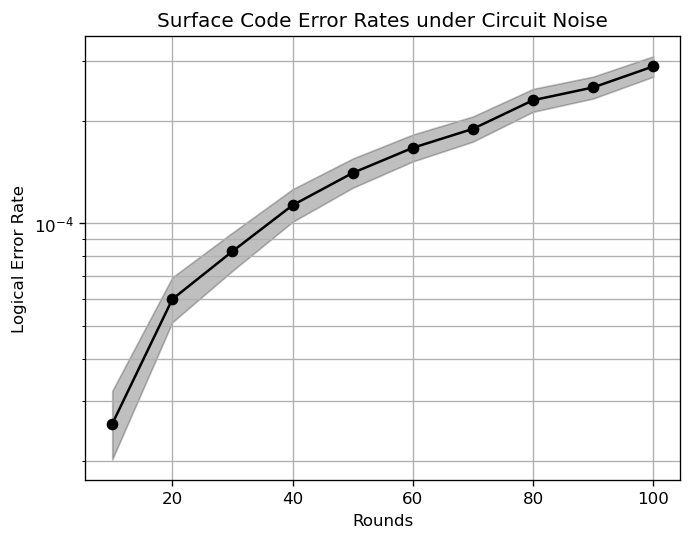

In [140]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['r'],
    # group_func=lambda stat: stat.json_metadata['d'],
    # failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
)
# ax.set_ylim(5e-3, 5e-2)
# ax.set_xlim(0.008, 0.012)
ax.semilogy()
ax.set_title("Surface Code Error Rates under Circuit Noise")
ax.set_xlabel("Rounds")
ax.set_ylabel("Logical Error Rate")
ax.grid(which='major')
ax.grid(which='minor')
# ax.legend()
fig.set_dpi(120)  # Show it bigger

In [141]:
collected_surface_code_stats

[sinter.TaskStats(strong_id='f4195ea982c79114c55d934f13a5cd4ecdd2cb8f162daef0b2343308adeb1bcf', decoder='pymatching', json_metadata={'d': 7, 'r': 10, 'p': 0.001}, shots=10000000, errors=257, seconds=22.283000000054017),
 sinter.TaskStats(strong_id='bccc3f55117d8d2db36819223942aab3909d15134dd02770a564f01663b7bc4b', decoder='pymatching', json_metadata={'d': 7, 'r': 20, 'p': 0.001}, shots=10000000, errors=598, seconds=43.64099999994505),
 sinter.TaskStats(strong_id='c4385ee92e7887e68d03669084c7c19f6db22c18d60c3084770d2021d511d580', decoder='pymatching', json_metadata={'d': 7, 'r': 30, 'p': 0.001}, shots=10000000, errors=827, seconds=65.53100000007544),
 sinter.TaskStats(strong_id='863db2db48b3db5294d850aa913eba01f242683c77df803bc6fb1ae3767f56f0', decoder='pymatching', json_metadata={'d': 7, 'r': 40, 'p': 0.001}, shots=10000000, errors=1130, seconds=86.64000000001397),
 sinter.TaskStats(strong_id='c77f5a41e2d3b2626395231de5b43dd65a4e0119f4cb2219cf71c88fb7425755', decoder='pymatching', json

In [142]:

for i in range(10):
    shots = collected_surface_code_stats[i].shots
    errors = collected_surface_code_stats[i].errors
    print(errors/shots)
    # print(1-(1-(errors/shots))**8)

2.57e-05
5.98e-05
8.27e-05
0.000113
0.0001406
0.0001667
0.0001895
0.0002301
0.0002509
0.0002893


In [85]:
circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=1,
            distance=6,
            after_clifford_depolarization=0.001,
            after_reset_flip_probability=0.001,
            before_measure_flip_probability=0.001,
            before_round_data_depolarization=0.001,
        )
print(circuit.without_noise())

QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(6, 0) 6
QUBIT_COORDS(7, 1) 7
QUBIT_COORDS(9, 1) 9
QUBIT_COORDS(10, 0) 10
QUBIT_COORDS(11, 1) 11
QUBIT_COORDS(1, 3) 14
QUBIT_COORDS(2, 2) 15
QUBIT_COORDS(3, 3) 16
QUBIT_COORDS(4, 2) 17
QUBIT_COORDS(5, 3) 18
QUBIT_COORDS(6, 2) 19
QUBIT_COORDS(7, 3) 20
QUBIT_COORDS(8, 2) 21
QUBIT_COORDS(9, 3) 22
QUBIT_COORDS(10, 2) 23
QUBIT_COORDS(11, 3) 24
QUBIT_COORDS(0, 4) 26
QUBIT_COORDS(1, 5) 27
QUBIT_COORDS(2, 4) 28
QUBIT_COORDS(3, 5) 29
QUBIT_COORDS(4, 4) 30
QUBIT_COORDS(5, 5) 31
QUBIT_COORDS(6, 4) 32
QUBIT_COORDS(7, 5) 33
QUBIT_COORDS(8, 4) 34
QUBIT_COORDS(9, 5) 35
QUBIT_COORDS(10, 4) 36
QUBIT_COORDS(11, 5) 37
QUBIT_COORDS(12, 4) 38
QUBIT_COORDS(1, 7) 40
QUBIT_COORDS(2, 6) 41
QUBIT_COORDS(3, 7) 42
QUBIT_COORDS(4, 6) 43
QUBIT_COORDS(5, 7) 44
QUBIT_COORDS(6, 6) 45
QUBIT_COORDS(7, 7) 46
QUBIT_COORDS(8, 6) 47
QUBIT_COORDS(9, 7) 48
QUBIT_COORDS(10, 6) 49
QUBIT_COORDS(11, 7) 50
QUBIT_COORDS(0, 8) 52
QUBIT_CO

In [5]:
from scipy.sparse import lil_matrix

dem = circuit.flattened().detector_error_model()
pcm = lil_matrix((dem.num_detectors, dem.num_errors), dtype=np.uint8)
lcm = lil_matrix((dem.num_observables, dem.num_errors), dtype=np.uint8)

errors = []
channel_probs = [e.args_copy()[0] for e in circuit.flattened().detector_error_model() if e.type=="error"]
for i, error_event in enumerate(circuit.explain_detector_error_model_errors()):
    dets = [det.dem_target.val for det in error_event.dem_error_terms if det.dem_target.is_relative_detector_id()]
    obs = [ob.dem_target.val for ob in error_event.dem_error_terms if ob.dem_target.is_logical_observable_id()]
    pcm[[dets],i] = 1
    lcm[[obs],i] = 1

print(pcm.shape)
print(lcm.shape)

(400, 6859)
(1, 6859)


In [12]:
from ldpc import bp_decoder

bp_dec = bp_decoder(
    pcm,
    channel_probs=channel_probs,
    max_iter=pcm.shape[1],
    bp_method="msl",
    ms_scaling_factor=0
)

bposd_dec = bposd_decoder(
    pcm, # the parity check matrix
    channel_probs=channel_probs, #assign error_rate to each qubit. This will override "error_rate" input variable
    max_iter=pcm.shape[1], #the maximum number of iterations for BP)
    bp_method="msl",
    ms_scaling_factor=0, #min sum scaling factor. If set to zero the variable scaling factor method is used
    osd_method="osd_cs", #the OSD method. Choose from:  1) "osd_e", "osd_cs", "osd0"
    osd_order=min(pcm.shape[0],10) #the osd search depth
)

count = 0
num_iters = 1000

sampler = circuit.compile_detector_sampler()
for i in tqdm(range(num_iters)):
    detection_events, observable_flips = sampler.sample(1, separate_observables=True)
    guessed_errors = bposd_dec.decode(detection_events[0])
    guessed_obs = (lcm @ guessed_errors) % 2

    if not np.all(observable_flips[0].astype(int) == guessed_obs):
        count += 1
print(count/num_iters)

100%|██████████| 1000/1000 [00:33<00:00, 30.26it/s]

0.0
